# Testing out how to extract f/I curves from recordings

In [1]:
import os
import sys
sys.path.append('..') # have to do this for relative imports in jupyter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from src.load_spike_h5 import load_spike_h5


In [76]:
# files to pull data from
spk_fname = 'Y:\\DendCompOsc\\output_16Hz_no_exc_mod\\spikes.h5'
v_fname = 'Y:\\DendCompOsc\\output_16Hz_no_exc_mod\\v_report.h5'


In [77]:
# load data
spk_t = load_spike_h5(spk_fname)


In [78]:
v_data = h5py.File(v_fname,'r')

In [79]:
soma_v = np.array(v_data['report']['biophysical']['data'][:,0])

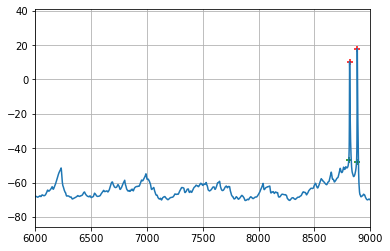

In [80]:
fig, ax = plt.subplots()
ax.plot(soma_v)
ax.scatter(x=spk_t, y=soma_v[spk_t],c='r',marker='+')
ax.scatter(x=spk_t-7, y=soma_v[spk_t-7],c='g',marker='+')
ax.set_xlim([6000,9000])
ax.grid()
plt.show()

In [71]:
edges_v = np.arange(-80,-40,1)

def ap_prob_func(spk, v, edges):
    null_hist = np.histogram(v, edges)
    spk_hist = np.histogram(v[spk-10], edges)
    spk_cum_prob = np.cumsum(spk_hist[0]/null_hist[0])
    return {'null': null_hist[0], 'spk': spk_hist[0], 'prob': spk_cum_prob}

In [72]:
ap_prob = ap_prob_func(spk_t, soma_v, edges_v)
null_hist = ap_prob['null']
spk_hist = ap_prob['spk']
spk_prob = ap_prob['prob']

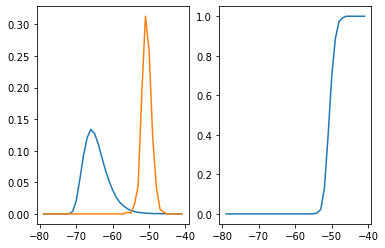

In [75]:
fig, ax = plt.subplots(1,2)
ax[0].plot(edges_v[1:], null_hist/np.sum(null_hist))
ax[0].plot(edges_v[1:], spk_hist/np.sum(spk_hist))
ax[1].plot(edges_v[1:], spk_prob/np.max(spk_prob)) 
plt.show()